In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
U = 5
a1 = 2
a2 = 2.5
d = 5

In [145]:
x = 3  
y = 4

z = x + 1j * y

In [146]:
# Flow Around Two Circular Cylinders
def F(z):
    return U * (z + a1**2/z) + U * ((z - d) + a2**2 / (z - d))

In [147]:
def phi(z):
    return np.real(F(z))

def psi(z):
    return np.imag(F(z))

In [148]:
print(f"Flow Around Two Circular Cylinders at ({x}, {y}): phi = {phi(z)}, psi = {psi(z)}")

Flow Around Two Circular Cylinders at (3, 4): phi = 4.274999999999999, psi = 30.55


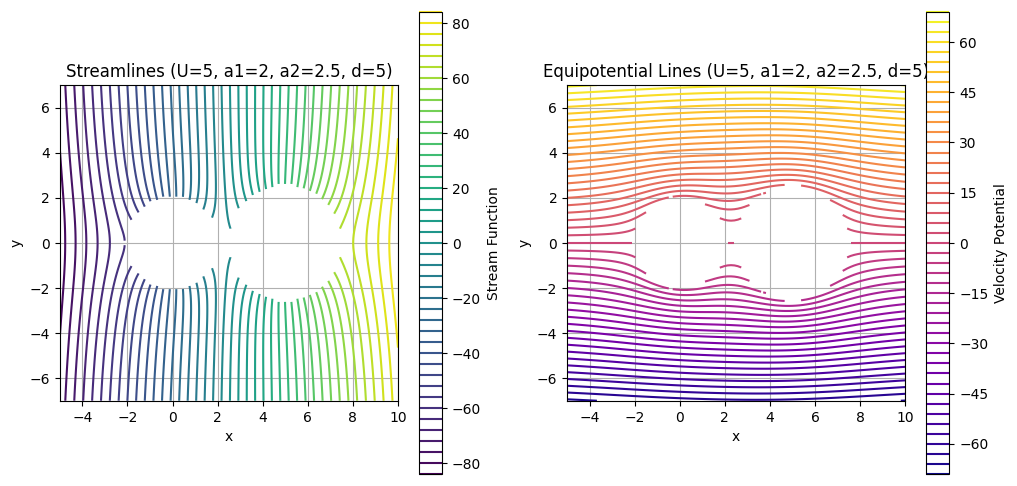

In [149]:
x_range = np.linspace(-5, 10, 100)
y_range = np.linspace(-7, 7, 100)

X, Y = np.meshgrid(x_range, y_range)

phi_values = np.zeros_like(X)
psi_values = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        phi_values[i, j] = psi(X[i, j] + 1j*Y[i, j])
        psi_values[i, j] = phi(X[i, j] + 1j*Y[i, j])

mask1 = np.abs(X + 1j*Y) >= a1
mask2 = np.abs(X - d + 1j*Y) >= a2
psi_masked = np.where(mask1 & mask2, psi_values, np.nan)
phi_masked = np.where(mask1 & mask2, phi_values, np.nan)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contour(X, Y, psi_masked, levels=50, cmap='viridis')
plt.colorbar(label="Stream Function")
plt.title(f"Streamlines (U={U}, a1={a1}, a2={a2}, d={d})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.contour(X, Y, phi_masked, levels=50, cmap='plasma')
plt.colorbar(label="Velocity Potential")
plt.title(f"Equipotential Lines (U={U}, a1={a1}, a2={a2}, d={d})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

plt.show()